<a href="https://colab.research.google.com/github/jayrom/enterprise_challenge_reply/blob/main/sprint_3/src/exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise preditiva de classificação

## Importar módulos

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import missingno as msno

## Carregar dataset

In [3]:
df = pd.read_csv("simulated_sensor_data.csv")

## Converter timestamp

In [4]:
# Converter a coluna 'timestamp' para o tipo datetime para facilitar a análise
df['timestamp'] = pd.to_datetime(df['timestamp'])

## Exibir dataset head

In [5]:
df.head()

,timestamp,device_id,temperature_c,current_amps,vibration_rms_g,days_to_failure,failure_mode
0,2025-06-27 11:55:16.608435,motor_1,46.10,7.04,0.25,-1,Normal
1,2025-06-27 12:05:16.608435,motor_1,44.47,5.99,0.25,-1,Normal
2,2025-06-27 12:15:16.608435,motor_1,44.25,5.25,0.16,-1,Normal
3,2025-06-27 12:25:16.608435,motor_1,47.72,5.40,0.27,-1,Normal
4,2025-06-27 12:35:16.608435,motor_1,44.11,5.71,0.26,-1,Normal


## Informações sobre o dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        17280 non-null  datetime64[ns]
 1   device_id        17280 non-null  object        
 2   temperature_c    17280 non-null  float64       
 3   current_amps     17280 non-null  float64       
 4   vibration_rms_g  17280 non-null  float64       
 5   days_to_failure  17280 non-null  int64         
 6   failure_mode     17280 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 945.1+ KB


### Exibir estatísticas básicas do dataframe

In [10]:
df.describe()

,timestamp,temperature_c,current_amps,vibration_rms_g,days_to_failure
count,17280,17280.000000,17280.000000,17280.000000,17280.000000
mean,2025-07-27 11:50:16.633220352,46.809517,6.367523,0.431252,3.125000
min,2025-06-27 11:55:16.608435,36.960000,4.130000,0.080000,-1.000000
25%,2025-07-12 11:52:46.620827648,44.060000,5.770000,0.230000,-1.000000
50%,2025-07-27 11:50:16.633220352,45.700000,6.180000,0.270000,-1.000000
75%,2025-08-11 11:47:46.645613312,47.930000,6.700000,0.350000,-0.500000
max,2025-08-26 11:45:16.658006,64.910000,10.100000,1.850000,30.000000
std,NaN,4.306738,0.910522,0.383971,8.353447


## Limpeza dos dados

### Verificar dados faltantes

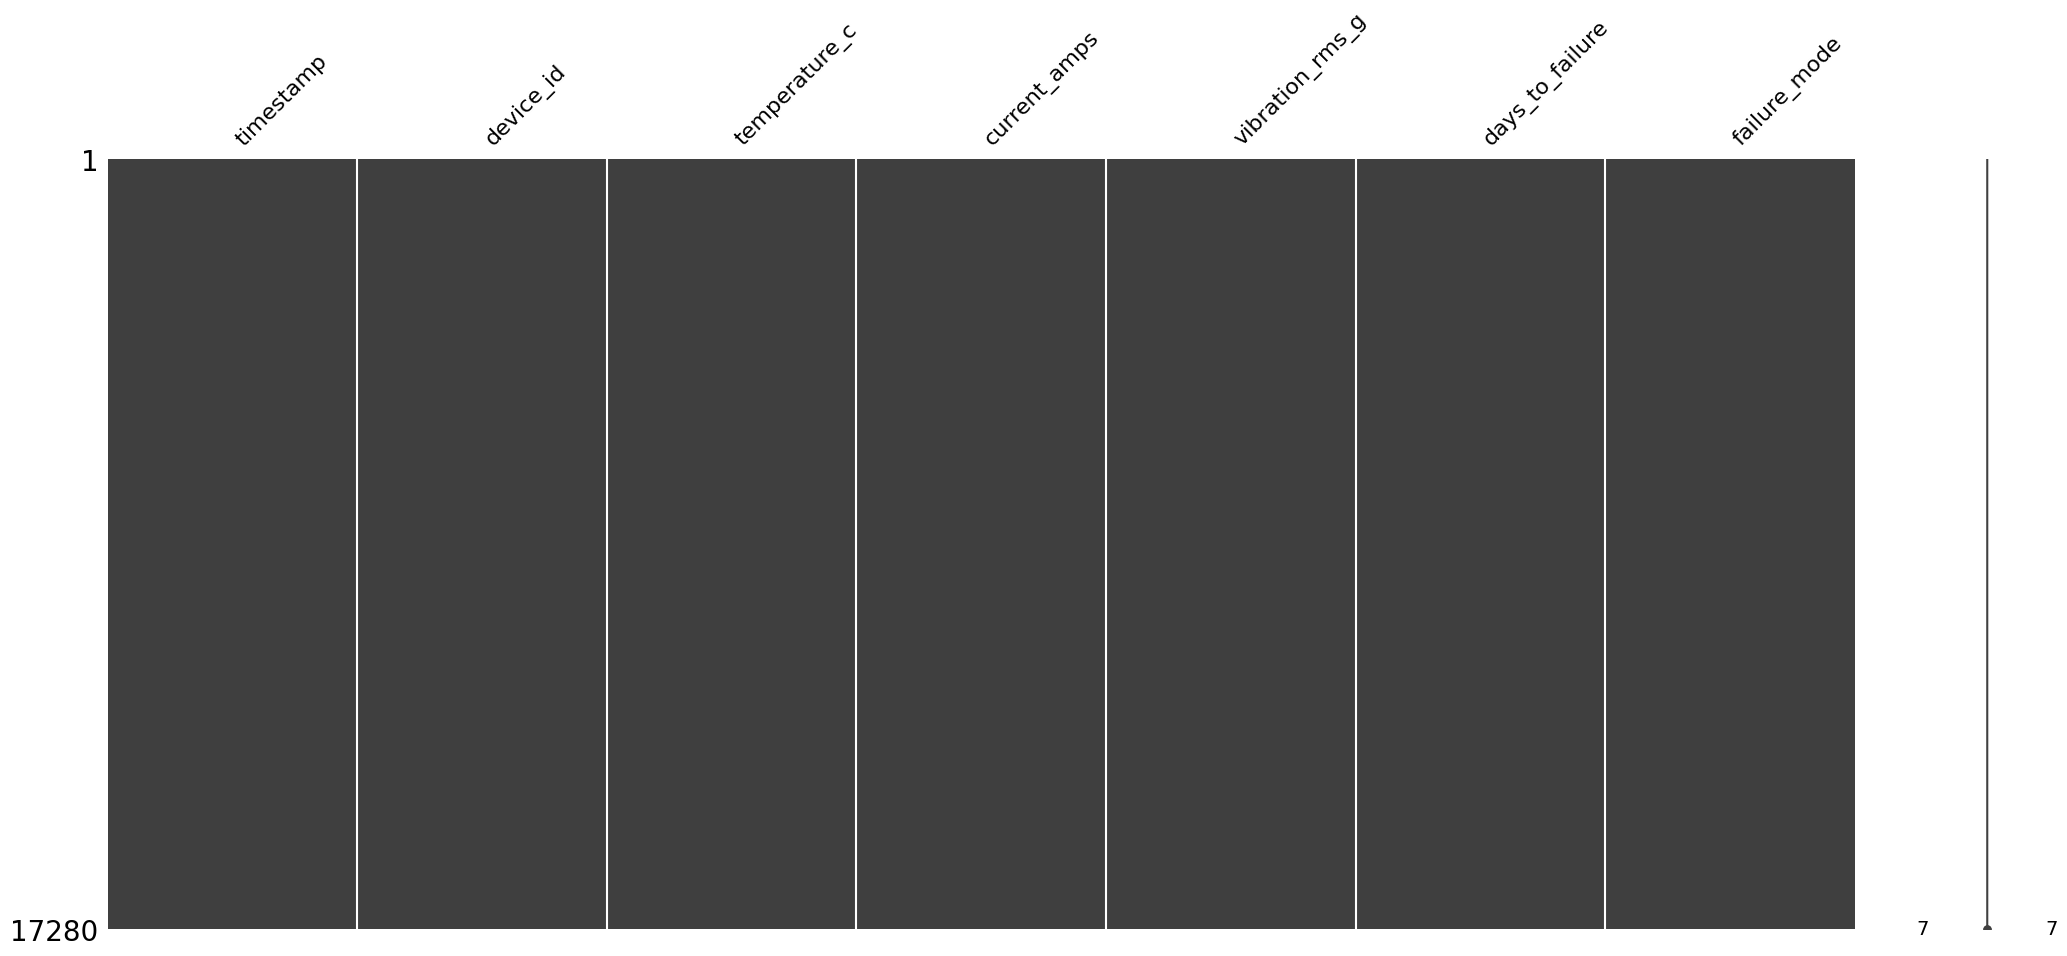

In [12]:
import missingno as msno
msno.matrix(df);

### Verificar dados duplicados

In [13]:
duplicates = df.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 0


### Remover duplicatas, se houver

In [14]:
df = df.drop_duplicates()

### Codificar dados categóricos nominais

In [11]:
cols_to_transform = ["device_id", "failure_mode"]
dummies = pd.get_dummies(df[cols_to_transform], prefix=cols_to_transform)
final = pd.concat([df, dummies], axis=1)
final

,timestamp,device_id,temperature_c,current_amps,vibration_rms_g,days_to_failure,failure_mode,device_id_motor_1,device_id_motor_2,failure_mode_Normal,failure_mode_Rolamento_Desgastado
0,2025-06-27 11:55:16.608435,motor_1,46.10,7.04,0.25,-1,Normal,True,False,True,False
1,2025-06-27 12:05:16.608435,motor_1,44.47,5.99,0.25,-1,Normal,True,False,True,False
2,2025-06-27 12:15:16.608435,motor_1,44.25,5.25,0.16,-1,Normal,True,False,True,False
3,2025-06-27 12:25:16.608435,motor_1,47.72,5.40,0.27,-1,Normal,True,False,True,False
4,2025-06-27 12:35:16.608435,motor_1,44.11,5.71,0.26,-1,Normal,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
17275,2025-08-26 11:05:16.658006,motor_2,41.68,6.83,0.22,-1,Normal,False,True,True,False
17276,2025-08-26 11:15:16.658006,motor_2,44.98,6.40,0.27,-1,Normal,False,True,True,False
17277,2025-08-26 11:25:16.658006,motor_2,44.47,5.87,0.19,-1,Normal,False,True,True,False
17278,2025-08-26 11:35:16.658006,motor_2,46.29,6.29,0.30,-1,Normal,False,True,True,False


## Investigar outliers

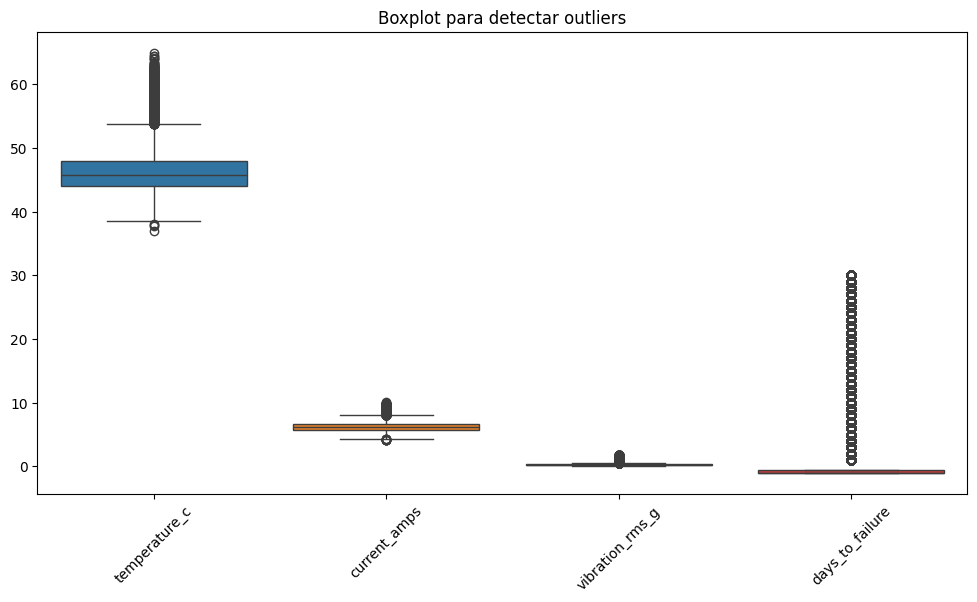

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

### Análise gráfica dos outliers

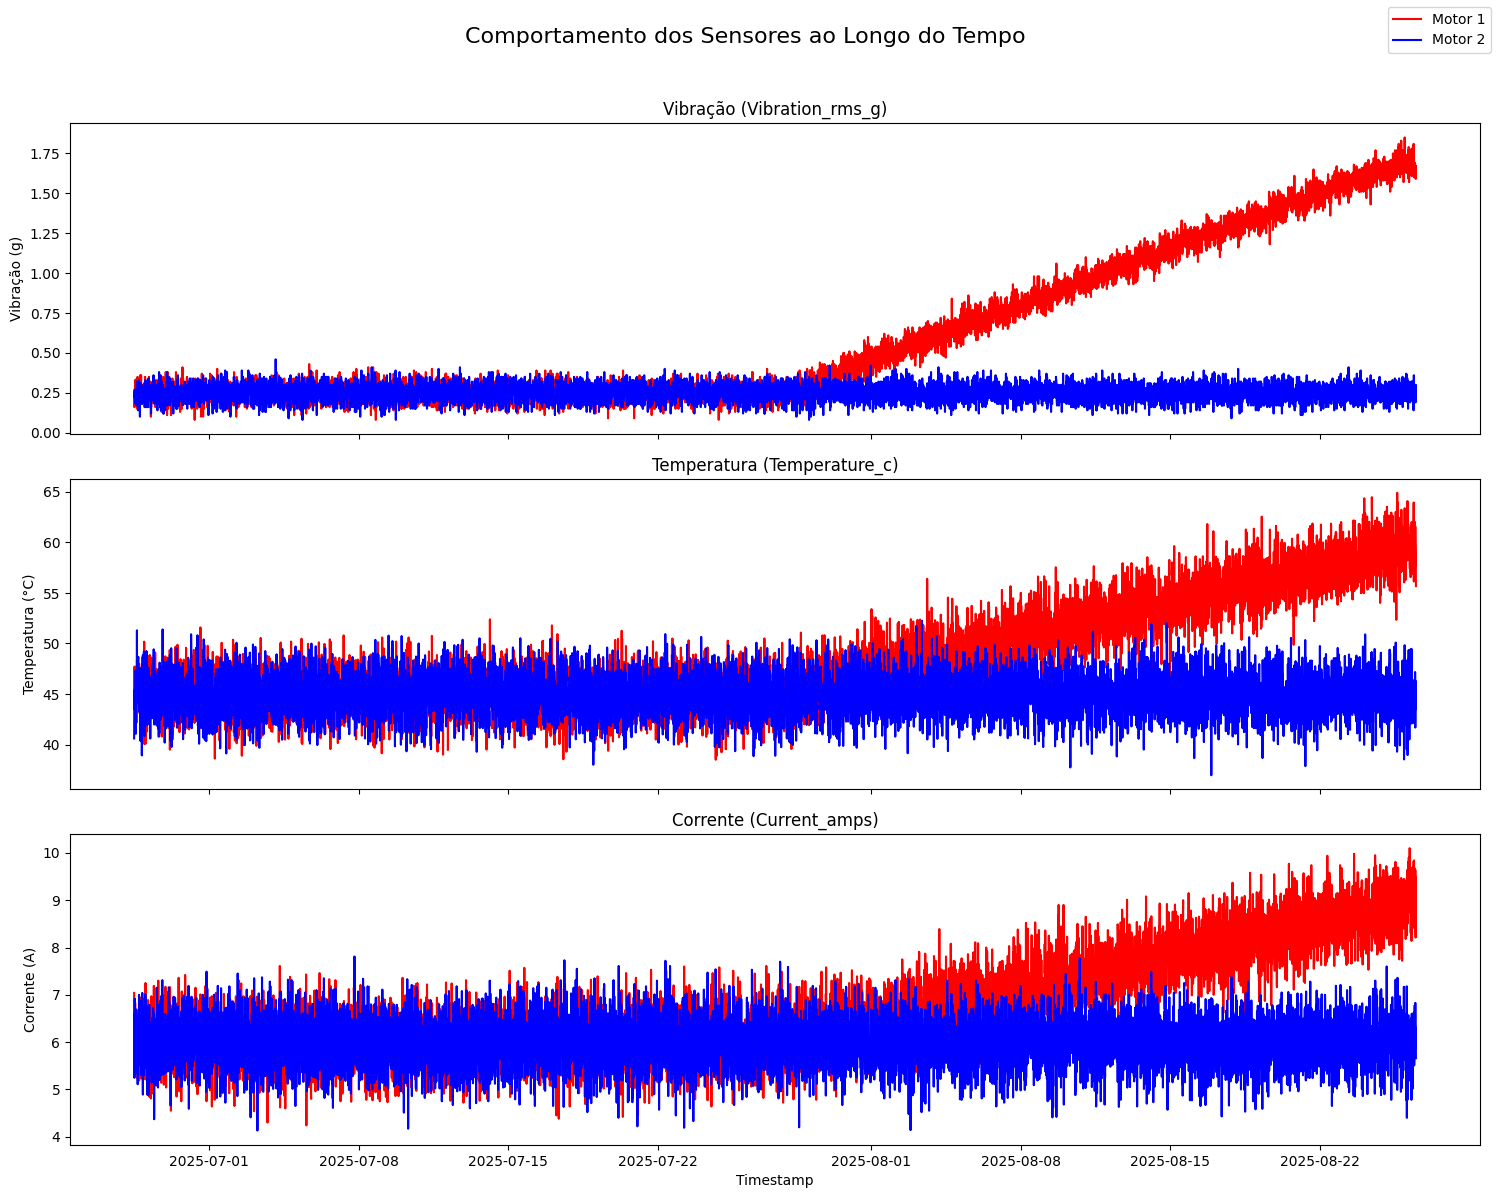

In [11]:
# Criar uma figura e eixos para os gráficos
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), sharex=True)

# Plotar os dados para o motor_1
axes[0].plot(df[df['device_id'] == 'motor_1']['timestamp'], df[df['device_id'] == 'motor_1']['vibration_rms_g'], label='Motor 1', color='red')
axes[1].plot(df[df['device_id'] == 'motor_1']['timestamp'], df[df['device_id'] == 'motor_1']['temperature_c'], color='red')
axes[2].plot(df[df['device_id'] == 'motor_1']['timestamp'], df[df['device_id'] == 'motor_1']['current_amps'], color='red')

# Plotar os dados para o motor_2 (linha de base)
axes[0].plot(df[df['device_id'] == 'motor_2']['timestamp'], df[df['device_id'] == 'motor_2']['vibration_rms_g'], label='Motor 2', color='blue')
axes[1].plot(df[df['device_id'] == 'motor_2']['timestamp'], df[df['device_id'] == 'motor_2']['temperature_c'], color='blue')
axes[2].plot(df[df['device_id'] == 'motor_2']['timestamp'], df[df['device_id'] == 'motor_2']['current_amps'], color='blue')

# Adicionar títulos e rótulos
axes[0].set_title('Vibração (Vibration_rms_g)')
axes[1].set_title('Temperatura (Temperature_c)')
axes[2].set_title('Corrente (Current_amps)')
axes[2].set_xlabel('Timestamp')
axes[0].set_ylabel('Vibração (g)')
axes[1].set_ylabel('Temperatura (°C)')
axes[2].set_ylabel('Corrente (A)')
fig.suptitle('Comportamento dos Sensores ao Longo do Tempo', fontsize=16)

# Adicionar uma legenda e exibir o gráfico
fig.legend(loc='upper right')
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta o layout para evitar sobreposição do título
plt.show()

### Investigar correlação entre outliers e falha

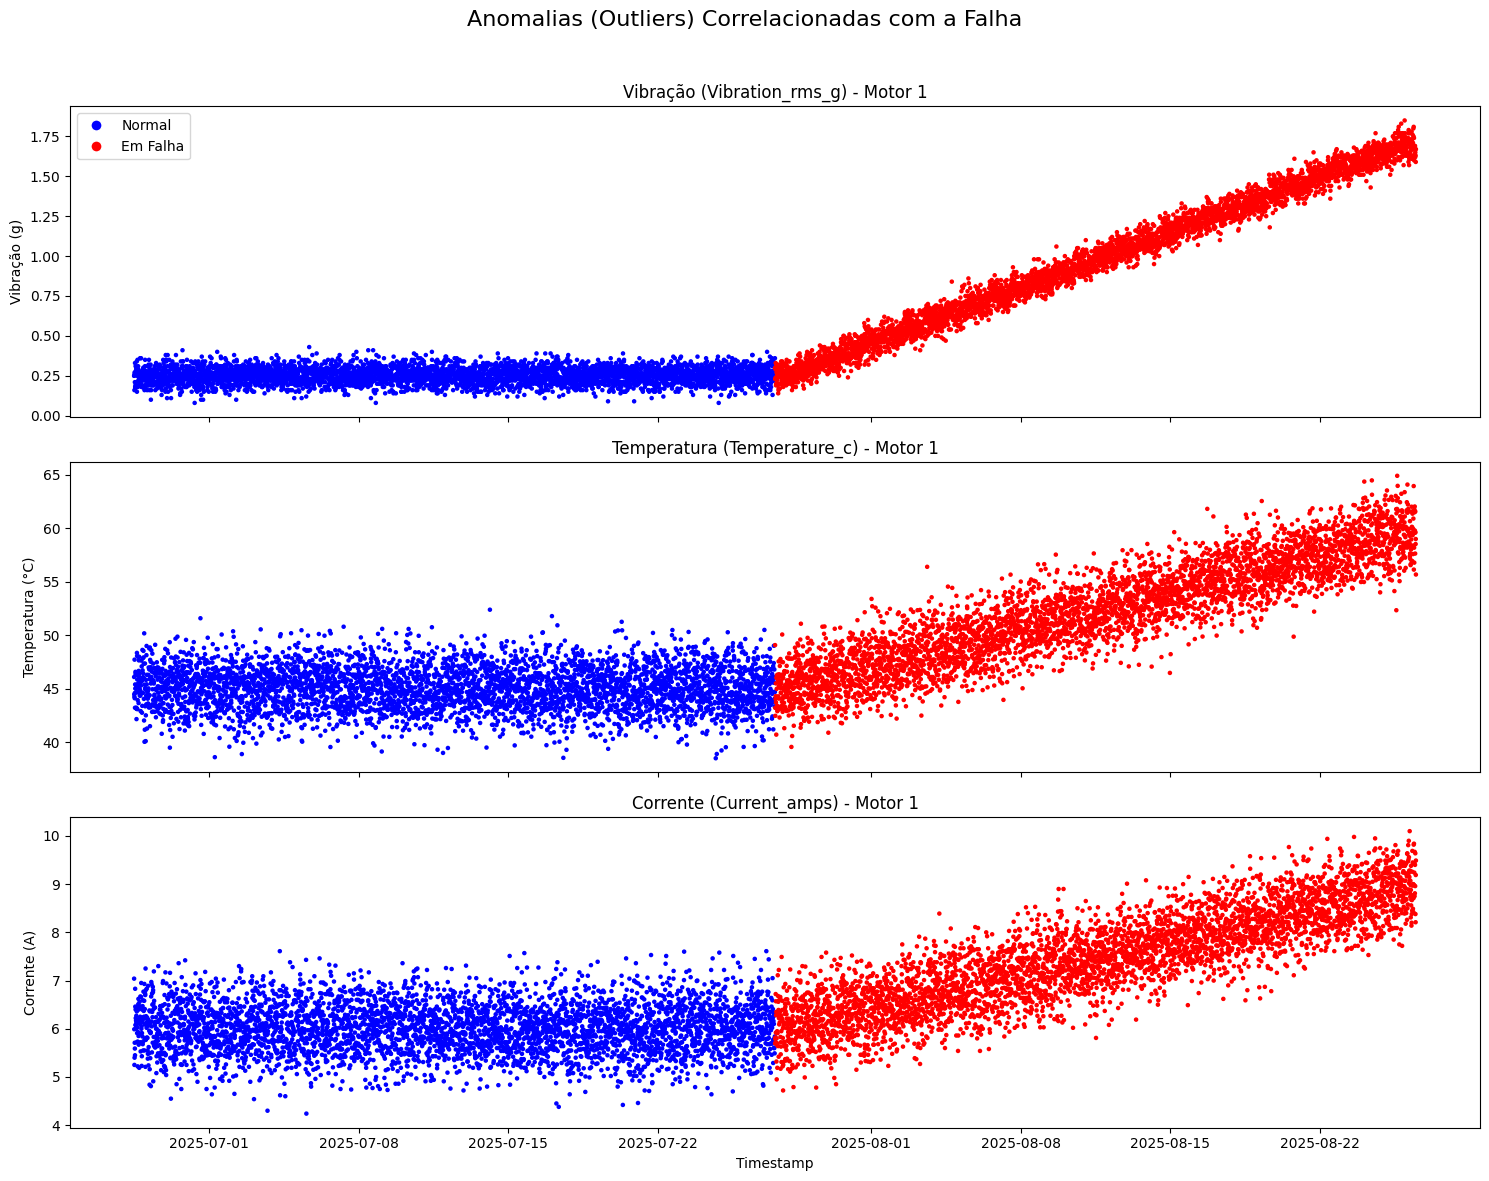

In [12]:
# Cópia do DataFrame original
df_plot = df.copy()

# Crie uma coluna 'status' para facilitar a visualização
df_plot['status'] = 'Normal'
df_plot.loc[df_plot['days_to_failure'] != -1, 'status'] = 'Em Falha'

# Filtrar o DataFrame apenas para o Motor 1, que é o que falhou
df_motor1 = df_plot[df_plot['device_id'] == 'motor_1']

# Criar uma figura e eixos para os gráficos
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), sharex=True)

# Definir as cores com base no status
colors = df_motor1['status'].map({'Normal': 'blue', 'Em Falha': 'red'})

# Plotar os dados do Motor 1, colorindo por status
axes[0].scatter(df_motor1['timestamp'], df_motor1['vibration_rms_g'], c=colors, s=5)
axes[1].scatter(df_motor1['timestamp'], df_motor1['temperature_c'], c=colors, s=5)
axes[2].scatter(df_motor1['timestamp'], df_motor1['current_amps'], c=colors, s=5)

# Adicionar rótulos e títulos
axes[0].set_title('Vibração (Vibration_rms_g) - Motor 1')
axes[1].set_title('Temperatura (Temperature_c) - Motor 1')
axes[2].set_title('Corrente (Current_amps) - Motor 1')
axes[2].set_xlabel('Timestamp')
axes[0].set_ylabel('Vibração (g)')
axes[1].set_ylabel('Temperatura (°C)')
axes[2].set_ylabel('Corrente (A)')
fig.suptitle('Anomalias (Outliers) Correlacionadas com a Falha', fontsize=16)

# Criar uma legenda manual
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Em Falha', markerfacecolor='red', markersize=8)
]
axes[0].legend(handles=legend_elements, loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Plot dos dados sem falhas

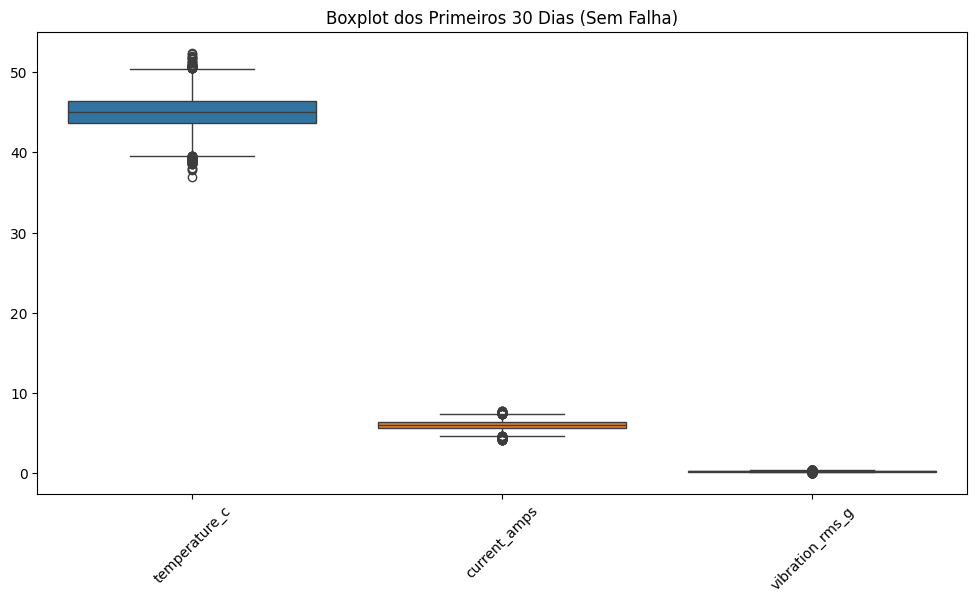

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar o DataFrame para os primeiros 30 dias de dados
df_first_30_days = df[df['days_to_failure'] == -1]

# Você também pode fazer isso por data, caso não tenha a coluna days_to_failure
# start_date = df['timestamp'].min()
# end_date = start_date + pd.Timedelta(days=30)
# df_first_30_days = df[(df['timestamp'] >= start_date) & (df['timestamp'] < end_date)]


# Boxplot dos dados filtrados
plt.figure(figsize=(12, 6))

# Filtrar variáveis de dados dos sensores
columns_to_plot = ['temperature_c', 'current_amps', 'vibration_rms_g']
sns.boxplot(data=df_first_30_days[columns_to_plot])
plt.title("Boxplot dos Primeiros 30 Dias (Sem Falha)")
plt.xticks(rotation=45)
plt.show()

### Correlação entre as variáveis

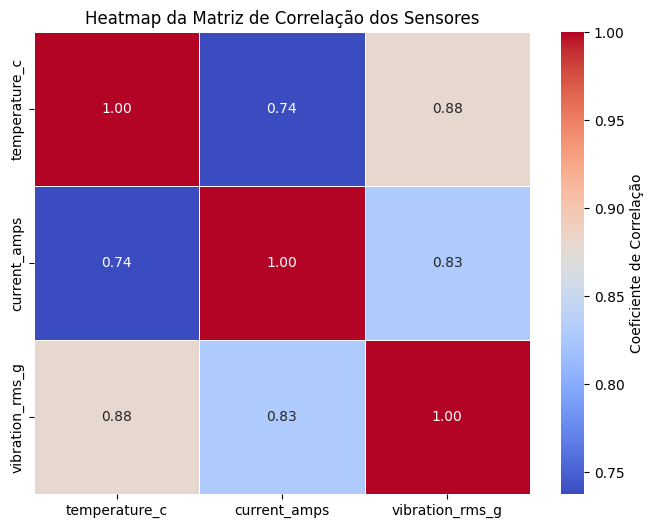

In [14]:
# Variáveis de interesse
sensor_data = df[['temperature_c', 'current_amps', 'vibration_rms_g']]

# Matriz de correlação
correlation_matrix = sensor_data.corr()

# Heatmap para visualizar a correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar_kws={'label': 'Coeficiente de Correlação'})

plt.title('Heatmap da Matriz de Correlação dos Sensores')
plt.show()

### Remover outliers, se houver

In [15]:
# Exemplo: substituir outliers da coluna 'Temperature' pela mediana
median_temperature = df['Temperature'].median()
df['Temperature'] = df['Temperature'].apply(lambda x: median_temperature if x > df['Temperature'].quantile(0.975) or x < df['Temperature'].quantile(0.025) else x)
df.shape

KeyError: 'Temperature'

## Distribuição dos labels

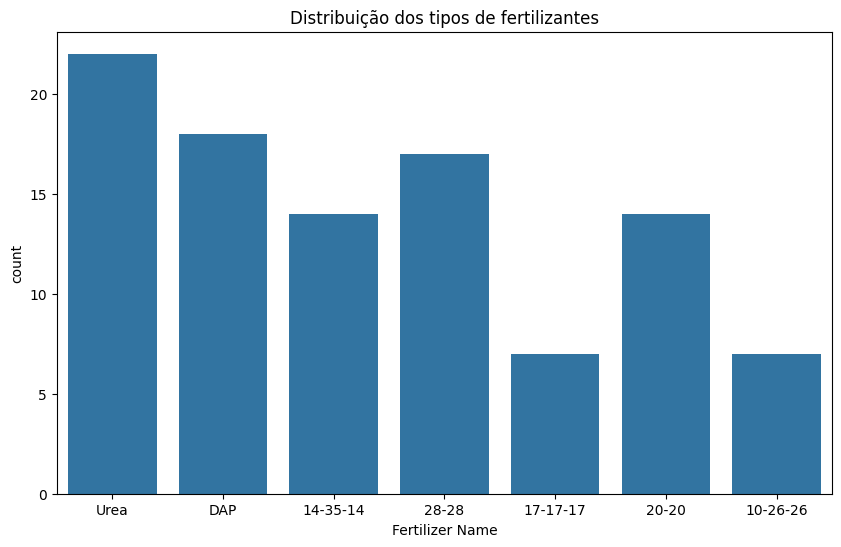

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fertilizer Name', data=df)
plt.title("Distribuição dos tipos de fertilizantes")
# plt.xticks(rotation=45)
plt.show()

## Correlação entre as features numéricas

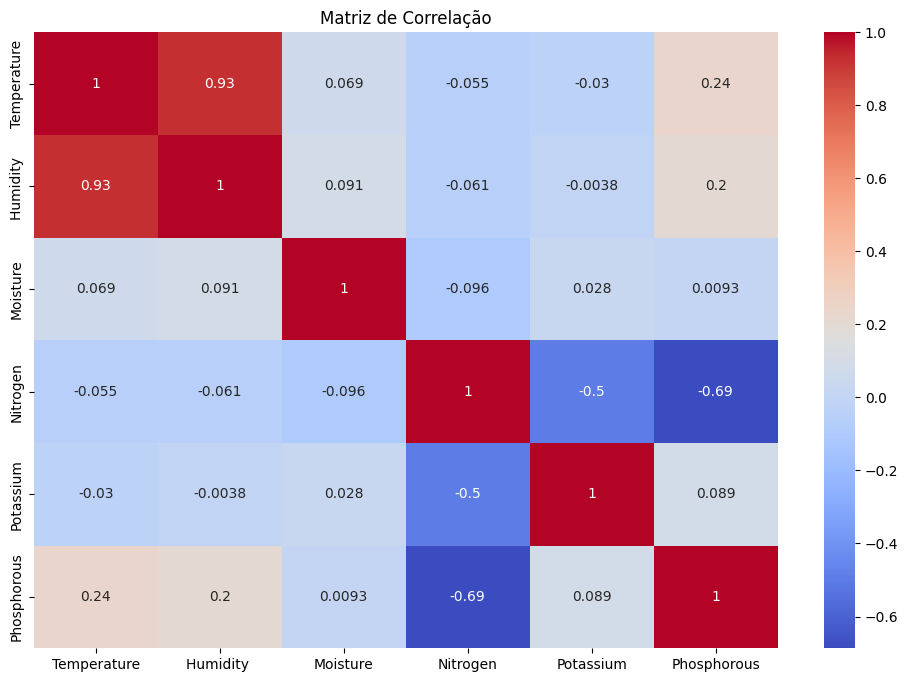

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

## Engenharia de features

### Separar features e labels

In [ ]:
# Labels
X = df.drop('Fertilizer Name', axis=1)

# Feature
y = df['Fertilizer Name']

### Padronizar e normalizar dados

In [ ]:
# Label Encoder para a variável alvo (y)
le = LabelEncoder()
y = le.fit_transform(y)

# Aplicar One-Hot Encoding para dados categóricos
categorical_cols = ['Soil Type', 'Crop Type']
ohe = OneHotEncoder(handle_unknown='ignore')
X_encoded = pd.DataFrame(ohe.fit_transform(X[categorical_cols]).toarray())
X_encoded = X_encoded.add_prefix('OHE_')

# Remover colunas categóricas originais
X = X.drop(categorical_cols, axis=1)

# Concatenar as features codificadas com as numéricas
X = pd.concat([X, X_encoded], axis=1)

# Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das features numéricas
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Regressão Logística



In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Acurácia Regressão Logística: 0.7
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.60      0.60      0.60         5
           5       0.57      0.80      0.67         5
           6       1.00      1.00      1.00         6

    accuracy                           0.70        20
   macro avg       0.53      0.48      0.49        20
weighted avg       0.69      0.70      0.68        20



## KNN - K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Acurácia KNN: 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.33      0.20      0.25         5
           5       0.33      0.20      0.25         5
           6       0.80      0.67      0.73         6

    accuracy                           0.30        20
   macro avg       0.24      0.18      0.20        20
weighted avg       0.41      0.30      0.34        20



## SVM - Support Vector Machine

### SVM - Kernel RBF (mais complexo)

In [ ]:

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)
print("Acurácia SVM (RBF):", accuracy_score(y_test, y_pred_svm_rbf))
print(classification_report(y_test, y_pred_svm_rbf))

Acurácia SVM (RBF): 0.35
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.43      0.60      0.50         5
           5       0.00      0.00      0.00         5
           6       1.00      0.50      0.67         6

    accuracy                           0.35        20
   macro avg       0.40      0.27      0.31        20
weighted avg       0.51      0.35      0.39        20



### SVM - Kernel polinomial (complexidade intermediária)

In [ ]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train_scaled, y_train)
y_pred_svm_poly = svm_poly.predict(X_test_scaled)
print("Acurácia SVM (Polinomial):", accuracy_score(y_test, y_pred_svm_poly))
print(classification_report(y_test, y_pred_svm_poly))

Acurácia SVM (Polinomial): 0.45
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.43      0.60      0.50         5
           5       0.60      0.60      0.60         5
           6       1.00      0.33      0.50         6

    accuracy                           0.45        20
   macro avg       0.43      0.29      0.32        20
weighted avg       0.66      0.45      0.49        20



### SVM - Kernel linear (menor complexidade)

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm_linear.predict(X_test_scaled)
print("Acurácia SVM (Linear):", accuracy_score(y_test, y_pred_svm_linear))
print(classification_report(y_test, y_pred_svm_linear))

Acurácia SVM (Linear): 0.85
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.85        20
   macro avg       0.55      0.50      0.51        20
weighted avg       0.86      0.85      0.84        20



## Decision trees

### Decision Tree

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("Acurácia Decision Tree:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Acurácia Decision Tree: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Acurácia Random Forest: 0.95
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20

